## Importing all necessary libraries

In [2]:
# Importing Pandas and NumPy for manipulating the data
import pandas as pd
import numpy as np 

# Importing matplotlib.pyplot for visualising data
import matplotlib.pyplot as plt 

# Importing some packages from sklearn:

# Importing train_test_split for splitting the dataset
from sklearn.model_selection import train_test_split

# Label encoder, to  encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Standard scaler, to standardise the features
from sklearn.preprocessing import StandardScaler

# Importing models:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Random Forest (Ensemble technique)
from sklearn.ensemble import RandomForestClassifier
# Gradient Boost (Ensemble technique)
from sklearn.ensemble import GradientBoostingClassifier


# Importing f1_score as the metric for analysing the model's performance
from sklearn.metrics import f1_score


## 1. Exploring The Dataset

In [3]:
# Load the train and test datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
# Get the length of both datasets
print(f"Train Dataset Length: {len(df_train)}")
print(f"Test Dataset Length: {len(df_test)}")

Train Dataset Length: 10966
Test Dataset Length: 7312


Displaying the first 5 rows of the datasets:

In [5]:
# First 5 rows of the train set
df_train.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0


In [6]:
# First 5 rows of the test set
df_test.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,TransactionAmount,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure
0,11854,963,35,man,Student,Bachelor,Single,4,53733.41 AUD,AU$ 29296.02,...,AU$ 225.64,M005,Payment,Darwin,Desktop,-37.020100,144.964600,chapmangabriel@outlook.com,True,39
1,2647,1693,23,Male,Professional,Master,Single,2,54856.77 AUD,34628.31 AUD,...,AU$ 658.1,M003,Purchase,Darwin,Desktop,-37.020100,144.964600,sjones@gmail.com,True,65
2,5945,4383,44,Male,Student,Bachelor,Single,2,59011.72 AUD,33312.46 AUD,...,AU$ 133.59,M004,Purchase,Adelaide,mob,-30.000233,136.209152,woodmaria@yahoo.com,False,95
3,6798,1350,40,Male,Student,High School,Married,3,AU$ 128795.4,67049.0 AUD,...,AU$ 6.74,M008,Withdrawal,Canberra,Mobile,-37.020100,144.964600,rthornton@gmail.com,False,85
4,12985,4145,18,Male,Professional,Bachelor,Married,3,AU$ 44506.03,22856.31 AUD,...,15.67 AUD,M008,Transfer,Perth,Tablet,-20.917574,142.702789,daniel61@outlook.com,True,102


Checking for **missing values** in both datasets

In [7]:
print("Missing values in train dataset:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])
print("----------------------")
print("Missing values in test dataset:")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])

Missing values in train dataset:
Latitude     43
Longitude    43
dtype: int64
----------------------
Missing values in test dataset:
Latitude     31
Longitude    31
dtype: int64


A quick informational overview of training and testing dataset:

In [8]:
# Train info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    10966 non-null  int64  
 1   UserID               10966 non-null  int64  
 2   Age                  10966 non-null  int64  
 3   Gender               10966 non-null  object 
 4   Occupation           10966 non-null  object 
 5   EducationLevel       10966 non-null  object 
 6   MaritalStatus        10966 non-null  object 
 7   NumDependents        10966 non-null  int64  
 8   Income               10966 non-null  object 
 9   Expenditure          10966 non-null  object 
 10  GiftsTransaction     10966 non-null  object 
 11  TransactionDate      10966 non-null  object 
 12  TransactionTime      10966 non-null  object 
 13  TransactionAmount    10966 non-null  object 
 14  MerchantID           10966 non-null  object 
 15  TransactionType      10966 non-null 

In [9]:
# Test info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7312 entries, 0 to 7311
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    7312 non-null   int64  
 1   UserID               7312 non-null   int64  
 2   Age                  7312 non-null   int64  
 3   Gender               7312 non-null   object 
 4   Occupation           7312 non-null   object 
 5   EducationLevel       7312 non-null   object 
 6   MaritalStatus        7312 non-null   object 
 7   NumDependents        7312 non-null   int64  
 8   Income               7312 non-null   object 
 9   Expenditure          7312 non-null   object 
 10  GiftsTransaction     7312 non-null   object 
 11  TransactionDate      7312 non-null   object 
 12  TransactionTime      7312 non-null   object 
 13  TransactionAmount    7312 non-null   object 
 14  MerchantID           7312 non-null   object 
 15  TransactionType      7312 non-null   o

In [10]:
print(f"Proportion of transactions that are not fraud: {df_train['IsFraud'].value_counts()[0]/len(df_train)*100}")
print(f"Proportion of transactions that are fraud: {df_train['IsFraud'].value_counts()[1]/len(df_train)*100}")

Proportion of transactions that are not fraud: 63.56921393397775
Proportion of transactions that are fraud: 36.43078606602225


This is **not a balanced dataset**; 63.56% of the transactions are not fraudulent, 36.43% are.

Hence, F1-score is a good evaluation metric.

## 2. Preparing the data

### Cleaning `Age`, `Gender`, and `Occupation` Columns: 

1. `Age` has a lot of erroneous values (negative age, age in tens of thousands). The below code gets rid of those.
2. `Gender` has several synonymous values that are now converted into binary values; 0 = Female, 1 = Male.
3. `Occupation` is a categorical variable. The below code performs label encoding to turn it into numerical.

In [13]:
from sklearn.preprocessing import LabelEncoder

def clean_age_gender_occupation(df):
    # Clean 'Age' column by making all ages positive and filtering to the valid range (10-78)
    df['Age'] = df['Age'].abs()  # Convert negative ages to absolute values
    df['Age'] = df['Age'].apply(lambda x: x / 1000 if x > 78  else x)  # Keep only ages within the specified range

    # Clean 'Gender' column by replacing gender variations with numerical codes
    df['Gender'] = df['Gender'].replace({
        'Female': 0, 'woman': 0, "isnotfemale": 1, 'fem': 0, 'she': 0, 
        'man': 1, 'isnotmale': 0, 'Male': 1, 'he': 1
    })

    # Initialize the label encoder for 'Occupation' column
    label_encoder = LabelEncoder()

    # Fit and transform the 'Occupation' column into numerical labels
    df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

    return df

# Apply to both train and test datasets
df_train = clean_age_gender_occupation(df_train)
df_test = clean_age_gender_occupation(df_test)

# Print the cleaned columns for both datasets
print(df_train[['Age', 'Gender', 'Occupation']].head())
print(df_test[['Age', 'Gender', 'Occupation']].head())

    Age  Gender  Occupation
0  37.0       0           0
1  34.0       1           2
2  25.0       1           3
3  25.0       1           0
4  38.0       1           0
    Age  Gender  Occupation
0  35.0       1           2
1  23.0       1           0
2  44.0       1           2
3  40.0       1           2
4  18.0       1           0


### Cleaning the following columns:
1. `EducationLevel` 
2. `MaritalStatus` 
3. `NumDependents`
4.  `Income` 

Below maps the categorical values of `EducationLevel` and `MaritalStatus` to numerical values:

**`EducationLevel`**

* 'High School': 1, 
* 'Bachelor': 2, 
* 'Master': 3, 
* 'PhD': 4

**`MaritalStatus`**

* 'Single': 1, 
* 'Married': 2, 
* 'Divorced': 3, 
* 'Widowed': 4

In [17]:
def clean_education_marital_income(df):
    # Clean the Income column by removing currency symbols and commas
    df['Income'] = df['Income'].str.replace(r'[^\d.]', '', regex=True)
    df['Income'] = df['Income'].astype(float)

    # Map categorical values to numeric codes
    education_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
    marital_mapping = {'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4}

    df['EducationLevel'] = df['EducationLevel'].map(education_mapping)
    df['MaritalStatus'] = df['MaritalStatus'].map(marital_mapping)

    # Ensure NumDependents is numeric
    df['NumDependents'] = pd.to_numeric(df['NumDependents'], errors='coerce')

    return df

# Apply to both train and test datasets
df_train = clean_education_marital_income(df_train)
df_test = clean_education_marital_income(df_test)


Previewing the cleaned columns for both datasets:

In [18]:
# Train
df_train[['EducationLevel', 'MaritalStatus', 'NumDependents', 'Income']].head()

,EducationLevel,MaritalStatus,NumDependents,Income
0,2,4,3,28884.43
1,1,2,4,54919.07
2,3,2,2,74728.57
3,1,2,3,55712.62
4,1,1,4,53004.70


In [19]:
# Test
df_test[['EducationLevel', 'MaritalStatus', 'NumDependents', 'Income']].head()

,EducationLevel,MaritalStatus,NumDependents,Income
0,2,1,4,53733.41
1,3,1,2,54856.77
2,2,1,2,59011.72
3,1,2,3,128795.40
4,2,2,3,44506.03


### Cleaning the following columns: 

1. `Expenditure` 
2. `GiftsTransaction` 
3. `TransactionDate` 
4. `TransactionTime`
5. `TransactionAmount` 

The below code uses **RegeX** to remove unnecessary string values from currency columns, so that they could be turned into **numerical (float) values**.

It also cleans `TransactionTime` by properly formatting it.

In [20]:
import pandas as pd

# Function to clean and convert the 'Expenditure', 'GiftsTransaction', and 'TransactionAmount' columns
def clean_transaction_columns(df):
    # Ensure columns are strings before using .str methods and then convert to float
    df['Expenditure'] = df['Expenditure'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)
    df['GiftsTransaction'] = df['GiftsTransaction'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)
    df['TransactionAmount'] = df['TransactionAmount'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

    # Convert 'TransactionDate' to datetime and extract useful features
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', format='%Y-%m-%d')
    df['TransactionMonth'] = df['TransactionDate'].dt.month  # Extract the month
    df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek  # Extract the day of the week

    return df

# Function to clean 'TransactionTime' and convert to proper time format
def clean_transaction_time(df):
    # Ensure that the time values are in string format
    df['TransactionTime_cleaned'] = df['TransactionTime'].astype(str).str.replace('/', ':', regex=True)
    
    # Convert valid time formats to 24-hour time
    df['TransactionTime_cleaned'] = pd.to_datetime(df['TransactionTime_cleaned'], format='%H:%M:%S', errors='coerce').dt.time
    
    # Attempt to parse 12-hour (AM/PM) format for remaining NaN values
    df['TransactionTime_cleaned'] = df['TransactionTime_cleaned'].fillna(
        pd.to_datetime(df['TransactionTime'], format='%I:%M:%S %p', errors='coerce').dt.time
    )

    return df

# Function to convert time to seconds (to enable correlation calculation)
def convert_time_to_seconds(time_col):
    return time_col.apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second if pd.notnull(t) else None)

Applying the functions `clean_transaction_columns()` and `clean_transaction_time()`:

In [21]:
# Apply the cleaning functions to both train and test datasets
df_train = clean_transaction_columns(df_train)
df_test = clean_transaction_columns(df_test)

# Clean 'TransactionTime' and convert to seconds for both train and test datasets
df_train = clean_transaction_time(df_train)
df_test = clean_transaction_time(df_test)

# Convert 'TransactionTime_cleaned' to seconds for correlation calculation
df_train['TransactionTime_seconds'] = convert_time_to_seconds(df_train['TransactionTime_cleaned'])
df_test['TransactionTime_seconds'] = convert_time_to_seconds(df_test['TransactionTime_cleaned'])

Saving `TransactionTime_seconds` back to `TransactionTime` and drop the `TransactionTime_seconds` column

In [22]:
df_train['TransactionTime'] = df_train['TransactionTime_seconds']
df_test['TransactionTime'] = df_test['TransactionTime_seconds']

Dropping `TransactionTime_seconds` and `TransactionTime_cleaned` as they're no longer needed

In [23]:
df_train.drop(columns=['TransactionTime_seconds', 'TransactionTime_cleaned'], inplace=True)
df_test.drop(columns=['TransactionTime_seconds', 'TransactionTime_cleaned'], inplace=True)

Removing the `TransactionDate` column from both train and test datasets

In [24]:
df_train.drop(columns=['TransactionDate'], inplace=True)
df_test.drop(columns=['TransactionDate'], inplace=True)

Previewing the cleaned columns for both train and test:

In [25]:
df_train[['Expenditure', 'GiftsTransaction', 'TransactionMonth', 'TransactionDayOfWeek', 'TransactionTime', 'TransactionAmount']].head()

,Expenditure,GiftsTransaction,TransactionMonth,TransactionDayOfWeek,TransactionTime,TransactionAmount
0,14610.61,1050.01,3,6,44757,258.14
1,39169.49,4969.71,3,6,66444,34.94
2,55873.76,1149.85,11,4,62216,323.82
3,89649.04,4335.70,10,5,2057,32.49
4,43601.02,4763.48,9,4,67208,1140.75


In [26]:
df_test[['Expenditure', 'GiftsTransaction', 'TransactionMonth', 'TransactionDayOfWeek', 'TransactionTime', 'TransactionAmount']].head()

,Expenditure,GiftsTransaction,TransactionMonth,TransactionDayOfWeek,TransactionTime,TransactionAmount
0,29296.02,2704.09,9,4,86399,225.64
1,34628.31,959.96,8,5,30198,658.10
2,33312.46,1964.20,3,6,29715,133.59
3,67049.00,9516.18,5,1,64261,6.74
4,22856.31,1737.75,11,5,70337,15.67


### Dropping the column `MerchantID` and cleaning columns `TransactionType`, `TransactionLocation`, and `DeviceType`

* `MerchantID` is irrelevant to Fraud detection. It's best to drop it.
* `TransactionType` is categorical. The following turns it into numerical (label encoding).
* `TransactionLocation` had a lot of erroneous, synonymous data ("Melbourne" = "Mel" = "MLB" etc.). The following condenses all such data into 8 unique cities, and label encodes it.
* `DeviceType` has values like "iPhone 15" or "android" that are synonymous with "Mobile". The following merges and label encodes it.

In [27]:
from sklearn.preprocessing import LabelEncoder

def clean_transaction_location_device_type(df):
    # Drop the 'MerchantID' column
    df.drop(columns=['MerchantID'], inplace=True)

    # Standardize 'TransactionLocation' entries for different cities
    df['TransactionLocation'] = df['TransactionLocation'].replace({
        'Adl': 'Adelaide', 'adl': 'Adelaide', 'Adelaide City': 'Adelaide',
        'BNE': 'Brisbane', 'Bne': 'Brisbane', 'brisbane': 'Brisbane',
        'CBR': 'Canberra', 'Cbr': 'Canberra', 'canberra': 'Canberra',
        'DRW': 'Darwin', 'Drw': 'Darwin', 'darwin': 'Darwin',
        'HBT': 'Hobart', 'Hbt': 'Hobart', 'hobart': 'Hobart',
        'MLB': 'Melbourne', 'Mel': 'Melbourne', 'Melb': 'Melbourne', 'Melburn': 'Melbourne', 'melbourne': 'Melbourne',
        'PTH': 'Perth', 'Pth': 'Perth', 'perth': 'Perth',
        'SYD': 'Sydney', 'Syd': 'Sydney', 'sydney': 'Sydney'
    })

    # Standardize 'DeviceType' entries
    df['DeviceType'] = df['DeviceType'].replace({
        'iphone 15': 'Mobile', 'android': 'Mobile', 'galaxys7': 'Mobile', 'smartphone': 'Mobile', 'mob': 'Mobile'
    })

    # Initialize the label encoder
    label_encoder = LabelEncoder()

    # Encode 'TransactionType', 'TransactionLocation', and 'DeviceType' using LabelEncoder
    df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
    df['TransactionLocation'] = label_encoder.fit_transform(df['TransactionLocation'])
    df['DeviceType'] = label_encoder.fit_transform(df['DeviceType'])    

    return df

# Apply to both train and test datasets
df_train = clean_transaction_location_device_type(df_train)
df_test = clean_transaction_location_device_type(df_test)

Previewing the cleaned columns for both train and test:

In [28]:
# Train
df_train[['TransactionType', 'TransactionLocation', 'DeviceType']].head()

,TransactionType,TransactionLocation,DeviceType
0,3,0,1
1,3,2,1
2,1,1,1
3,1,3,1
4,3,5,2


In [29]:
df_test[['TransactionType', 'TransactionLocation', 'DeviceType']].head()

,TransactionType,TransactionLocation,DeviceType
0,0,3,0
1,1,3,0
2,1,0,1
3,3,2,1
4,2,6,2


**Label encoding for `TransactionLocation`:

1. Adelaide = 0
2. Brisbane = 1
3. Canberra = 2
4. Darwin = 3
5. Hobart = 4
6. Melbourne = 5
7. Perth = 6
8. Sydney = 7

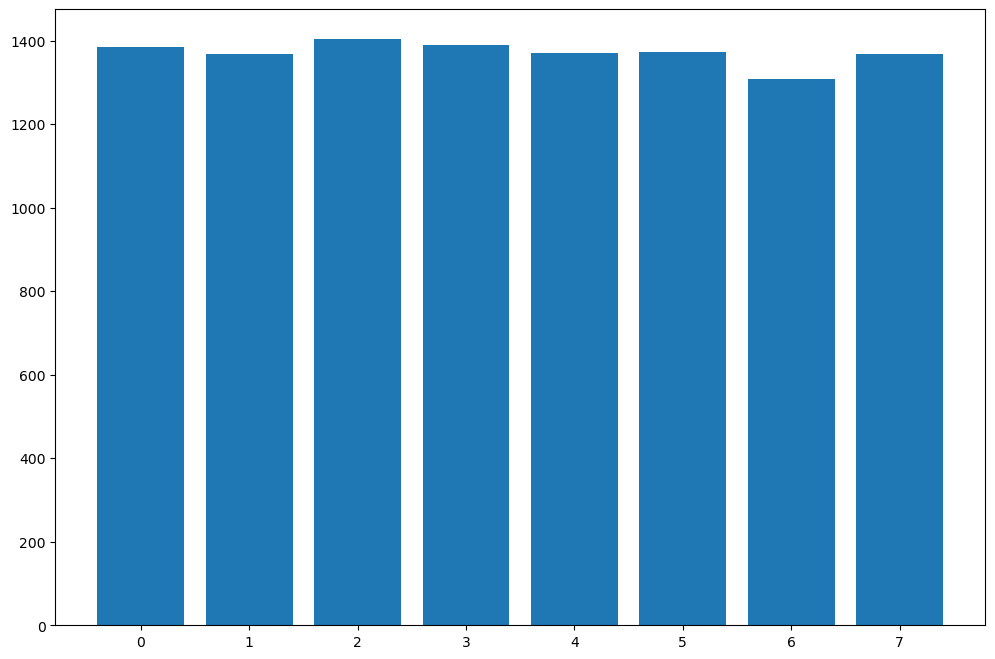

In [30]:
plt.figure(figsize=(12,8))
bar = plt.bar(df_train['TransactionLocation'].value_counts().index,df_train['TransactionLocation'].value_counts().values)

The distribution of transaction locations seems uniform. However, for fraudulent transactions specifically,

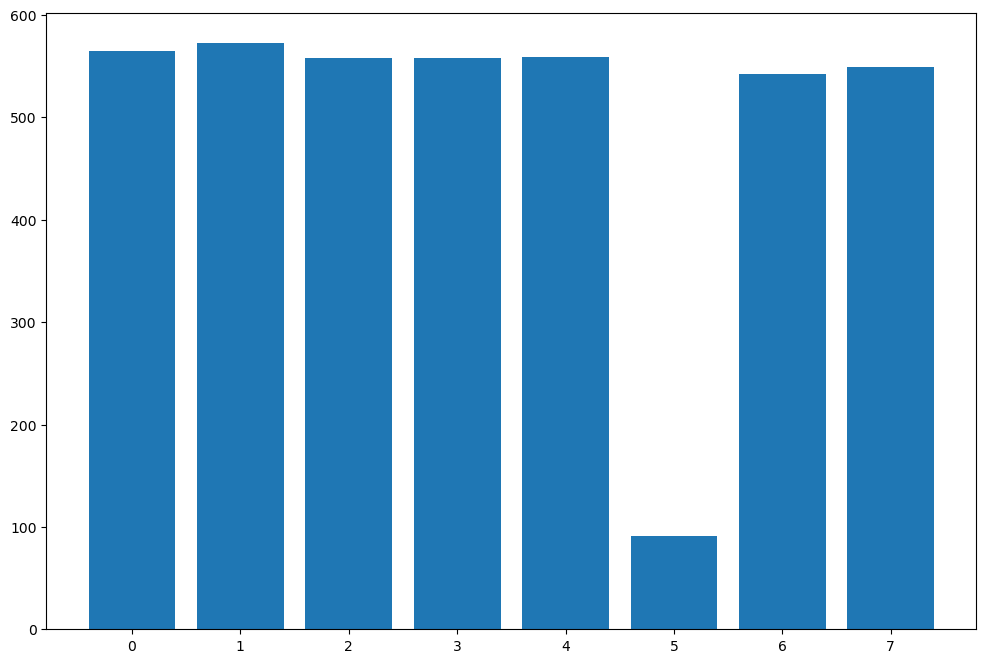

In [32]:
df_train_fraud = df_train.loc[df_train['IsFraud']==1]
plt.figure(figsize=(12,8))
bar = plt.bar(df_train_fraud['TransactionLocation'].value_counts().index,df_train_fraud['TransactionLocation'].value_counts().values)

We can see that there's significantly lower fraudulent transactions coming out of Melbourne (5).

Label Encoding for `TransactionType`:

1. Payment = 0
2. Purchase = 1
3. Transfer = 2
4. Withdrawal = 3

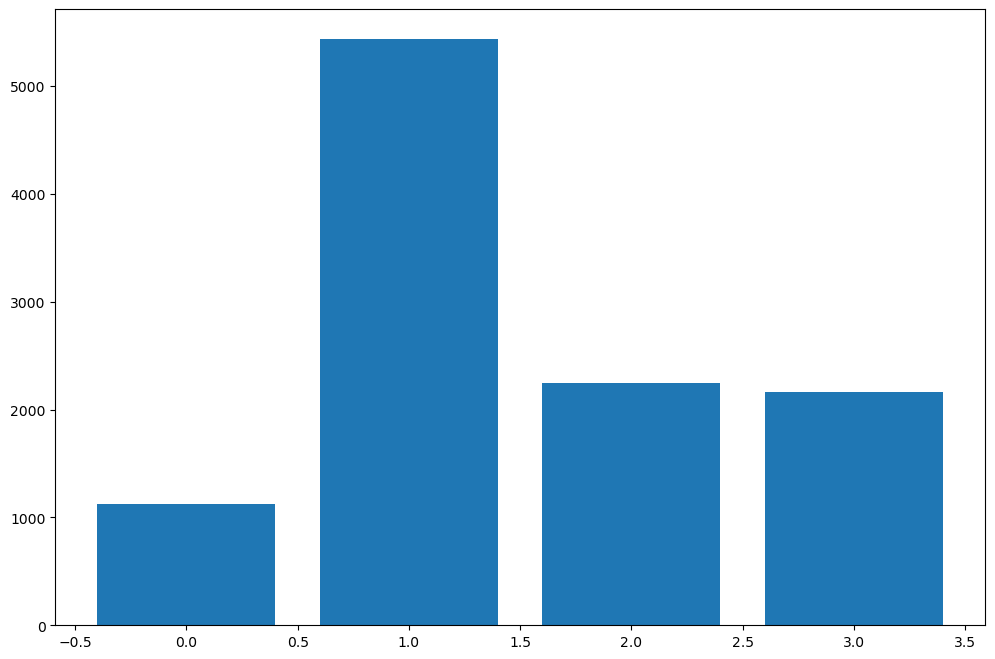

In [33]:
plt.figure(figsize=(12,8))
bar = plt.bar(df_train['TransactionType'].value_counts().index,df_train['TransactionType'].value_counts().values)

Most of all transactions are done through purchases (1).

However, for fraudulent transactions,

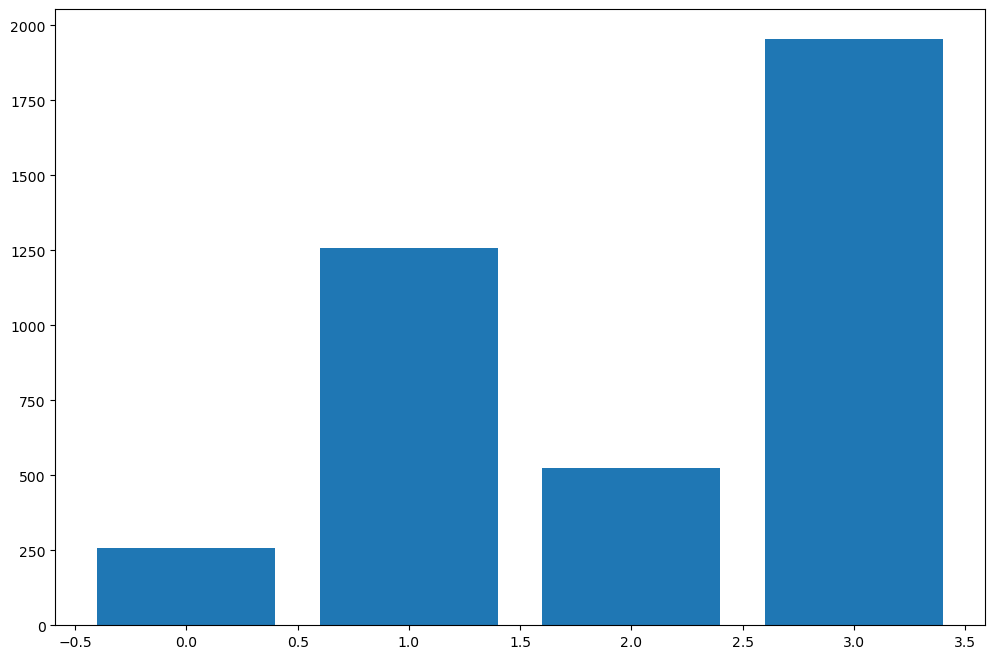

In [34]:
plt.figure(figsize=(12,8))
bar = plt.bar(df_train_fraud['TransactionType'].value_counts().index,df_train_fraud['TransactionType'].value_counts().values)

We can see that withdrawals (3) account for most fraudulent transactions.

We can infer from this that **most fraudulent transactions are made through withdrawals**. Withdrawal transactions therefore need to be focused on to mitigate fraudulent transactions.

### Dropping `Email` and cleaning column `Terrorism`:

* `Email` is irrelevant to `IsFraud` and should be dropped.
* `Terrorism` is turned form boolean to numeric.

In [36]:
def clean_terrorism(df):
    # Drop the 'EmailDomain' column
    df.drop(columns=['EmailDomain'], inplace=True)

    # Transform the 'Terrorism' column from boolean to numeric (1 for True, 0 for False)
    df['Terrorism'] = df['Terrorism'].astype(int)

    return df

# Apply to both train and test datasets
df_train = clean_terrorism(df_train)
df_test = clean_terrorism(df_test)

Previewing the cleaned columns from train and test:

In [37]:
# Train
df_train[['Terrorism', 'UserTenure']].head()

,Terrorism,UserTenure
0,0,113
1,0,104
2,0,105
3,0,70
4,0,27


In [38]:
df_test[['Terrorism', 'UserTenure']].head()

,Terrorism,UserTenure
0,1,39
1,1,65
2,0,95
3,0,85
4,1,102


### Cleaning columns `Latitude` and `Longitude` and creating a new column `LocationMatch`:

* The following code maps latitude and longitude to a 'city'
* Then, it matches the cities (from where the users made the transaction) to the transaction location (cities where the transaction was performed).
* The matches produce numerical values representing True or False: 0 = False (mismatch), 1 = True (match).

In [39]:
import pandas as pd
import numpy as np

label_encoder = LabelEncoder()

# Step 1: Define latitude/longitude ranges for Australian cities
city_coords = {
    'Sydney': {'lat_min': -34, 'lat_max': -33, 'long_min': 150, 'long_max': 151},
    'Melbourne': {'lat_min': -38, 'lat_max': -37, 'long_min': 144, 'long_max': 145},
    'Brisbane': {'lat_min': -28, 'lat_max': -27, 'long_min': 152, 'long_max': 153},
    'Adelaide': {'lat_min': -35, 'lat_max': -34, 'long_min': 138, 'long_max': 139},
    'Canberra': {'lat_min': -36, 'lat_max': -35, 'long_min': 149, 'long_max': 150},
    'Perth': {'lat_min': -32, 'lat_max': -31, 'long_min': 115, 'long_max': 116},
    'Hobart': {'lat_min': -43, 'lat_max': -42, 'long_min': 147, 'long_max': 148},
    'Darwin': {'lat_min': -13, 'lat_max': -12, 'long_min': 130, 'long_max': 131},
}

# Step 2: Function to map Latitude and Longitude to city based on ranges
def map_lat_long_to_city(lat, long):
    for city, bounds in city_coords.items():
        if bounds['lat_min'] <= lat <= bounds['lat_max'] and bounds['long_min'] <= long <= bounds['long_max']:
            return city
    return 'Unknown'

# Step 3: Apply the function to create a new column 'DerivedCity'
def apply_city_mapping(df):
    df['DerivedCity'] = df.apply(lambda row: map_lat_long_to_city(row['Latitude'], row['Longitude']), axis=1)
    df['DerivedCity'] = label_encoder.fit_transform(df['DerivedCity'])
    return df

# Step 4: Create a new column 'LocationMatch'
def create_location_match(df):
    df['LocationMatch'] = df.apply(lambda row: 1 if row['DerivedCity'] == row['TransactionLocation'] else 0, axis=1)
    return df

# Apply to both train and test datasets
df_train = apply_city_mapping(df_train)
df_test = apply_city_mapping(df_test)

df_train = create_location_match(df_train)
df_test = create_location_match(df_test)

Previewing train and test sets to show the `LocationMatch` column:

In [40]:
# Train
df_train[['TransactionLocation', 'DerivedCity', 'LocationMatch']].head()

,TransactionLocation,DerivedCity,LocationMatch
0,0,2,0
1,2,1,0
2,1,2,0
3,3,1,0
4,5,1,0


In [41]:
# Test
df_test[['TransactionLocation', 'DerivedCity', 'LocationMatch']].head()

,TransactionLocation,DerivedCity,LocationMatch
0,3,1,0
1,3,1,0
2,0,2,0
3,2,1,0
4,6,2,0


Counting the number of matches (1) and mismatches (0) in the `LocationMatch` column for both datasets:

In [42]:
# Train
train_location_match_count = df_train['LocationMatch'].value_counts()
train_location_match_count

0    9571
1    1395
Name: LocationMatch, dtype: int64

In [43]:
# Test
test_location_match_count = df_test['LocationMatch'].value_counts()
test_location_match_count

0    6392
1     920
Name: LocationMatch, dtype: int64

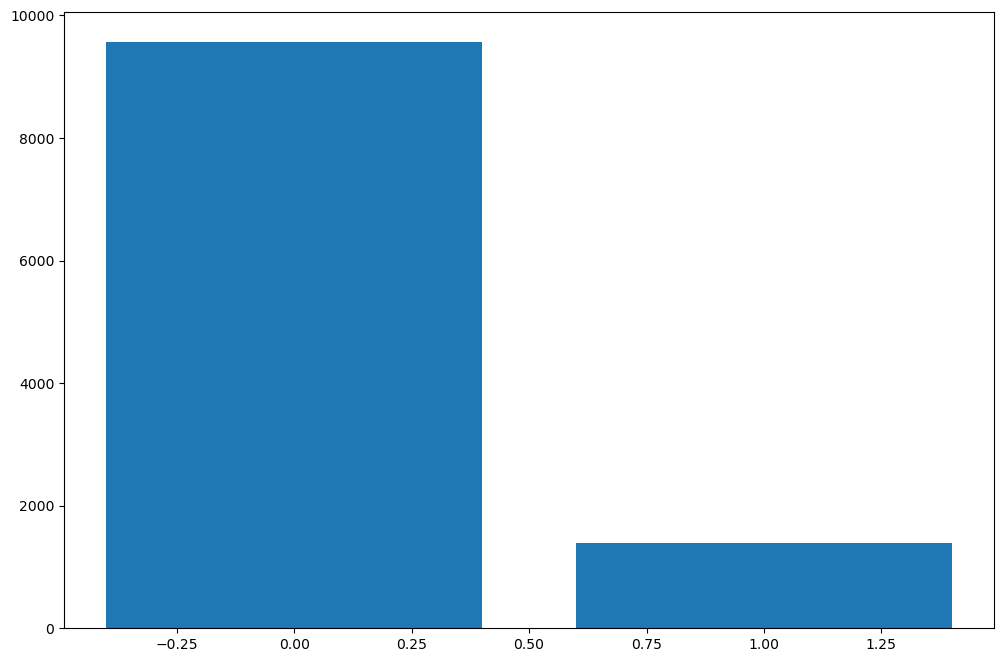

In [44]:
plt.figure(figsize=(12,8))

bar = plt.bar(train_location_match_count.index, train_location_match_count.values)

### Finding the correlation:

Finally, now that we have several derived numerical columns, and the training dataset has been prepared for modelling, we calculate their correlations with the target column `IsFraud`.

This will tell us which features to focus on during modelling.

In [33]:
# Step 1: Ensure 'IsFraud' is present in the DataFrame
if 'IsFraud' not in df_train.columns:
    raise ValueError("The target column 'IsFraud' is missing in the DataFrame.")

# Step 2: Drop 'DerivedCity' (which is an object column) from the DataFrame
df_numeric = df_train.drop(columns=['DerivedCity'])

# Step 3: Compute the correlation matrix for the remaining columns
correlation_matrix = df_numeric.corr()

# Step 4: Extract and print the correlation of all columns with 'IsFraud'
is_fraud_correlation = correlation_matrix['IsFraud']
print("Correlation of all columns with 'IsFraud':")
print(is_fraud_correlation)

Correlation of all columns with 'IsFraud':
TransactionNumber       0.026396
UserID                  0.016719
Age                    -0.005097
Gender                  0.001442
Occupation              0.015472
EducationLevel          0.011363
MaritalStatus           0.024486
NumDependents          -0.027305
Income                  0.012592
Expenditure             0.011879
GiftsTransaction        0.014263
TransactionTime        -0.494367
TransactionAmount       0.103385
TransactionType         0.451434
TransactionLocation    -0.060954
DeviceType              0.004224
Latitude                0.005265
Longitude               0.003647
Terrorism               0.013633
UserTenure              0.004936
IsFraud                 1.000000
TransactionMonth       -0.047666
TransactionDayOfWeek    0.004788
LocationMatch           0.030590
Name: IsFraud, dtype: float64


### Selecting the top 7 features from the training dataset based on correlation with `IsFraud`:

In [34]:
def select_top_features(df, target_column, top_n):
    correlation_matrix = df.corr()
    top_columns = correlation_matrix[target_column].abs().sort_values(ascending=False).head(top_n + 1).index  # +1 for target column
    top_columns = top_columns.drop(target_column)  # Exclude the target column
    return top_columns

top_7_columns = select_top_features(df_train, 'IsFraud', 7)
print(top_7_columns)

Index(['TransactionTime', 'TransactionType', 'TransactionAmount',
       'TransactionLocation', 'TransactionMonth', 'LocationMatch',
       'NumDependents'],
      dtype='object')


### Extracting 20% of the train set to form a validation set

The validation set is to be used for model evaluation

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Step 1: Define the features (X) and target (y)
X = df_train[top_7_columns]  # Top 7 features
y = df_train['IsFraud']      # Target column

# Step 2: Split the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 4: Print the shapes of the datasets to verify the split
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

# This code prepares the data, no model training yet

Training set shape: (8772, 7)
Validation set shape: (2194, 7)
Training labels shape: (8772,)
Validation labels shape: (2194,)


## 3. Training The Models

### Logistic Regression:

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize and train a model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val_scaled)

# Calculate F1 score
f1 = f1_score(y_val, y_val_pred)
print(f"F1 Score on validation set: {f1}")


F1 Score on validation set: 0.7614795918367346


Logistic Regression is a simple model. This makes it easy to implement, but not very powerful to implement

### K-Nearest Neighbors (KNN):

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Step 1: Create an instance of the K Nearest Neighbours model for classification
knn_model = KNeighborsClassifier()

# Step 2: Create a dictionary of all values we want to test for 'n_neighbors'
param_grid_knn = {'n_neighbors': np.arange(1, 25)}

# Step 3: Using GridSearch Cross Validation to find the best 'n_neighbors'
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=10, scoring='f1')

# Step 4: Fitting the model with GridSearch
grid_search_knn.fit(X_train_scaled, y_train)

# Step 5: Getting the best model and hyperparameters
best_knn_model = grid_search_knn.best_estimator_
best_params_knn = grid_search_knn.best_params_

print("Best hyperparameters for KNN:", best_params_knn)

# Step 6: Fitting the best model on the training data
best_knn_model.fit(X_train_scaled, y_train)

# Step 7: Predicting the target variable for the validation set
y_val_pred_knn = best_knn_model.predict(X_val_scaled)

# Step 8: Calculate the F1 score on the validation set
f1_knn = f1_score(y_val, y_val_pred_knn)
print(f"F1 Score for KNN with tuned parameters: {f1_knn}")

# Step 9: Predicting the target variable for the test dataset
y_test_pred_knn = best_knn_model.predict(X_test_scaled)

# Step 10: Create a DataFrame for submission with 'TransactionNumber' and 'IsFraud'
sub_knn = pd.DataFrame({
    'TransactionNumber': df_test['TransactionNumber'],  # Assuming the test dataset has this column
    'IsFraud': y_test_pred_knn  # Predictions from the KNN model
})

# Step 11: Save the DataFrame to a CSV file
sub_knn.to_csv('predictions_knn.csv', index=False)

# Step 12: Use cross-validation to calculate the RMSE (or F1 for classification)
f1_scores_knn = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=10, scoring='f1')
print("Cross-validated F1 Scores for KNN:", f1_scores_knn)
print("Mean F1 Score for KNN:", np.mean(f1_scores_knn))

Best hyperparameters for KNN: {'n_neighbors': 1}
F1 Score for KNN with tuned parameters: 0.9383647798742139
Cross-validated F1 Scores for KNN: [0.92038217 0.93001555 0.90852713 0.93103448 0.93858268 0.91975309
 0.9148265  0.90712074 0.91023622 0.93558282]
Mean F1 Score for KNN: 0.9216061379846401


KNN shows a significant improvement over Logistic Regression; but better models and more complex techniques can be implemented to get a greater F1 score.

### Support Vector Classifier (SVC):


In [37]:
from sklearn.svm import SVC

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred_svc = svc_model.predict(X_val_scaled)

# Calculate F1 score
f1_svc = f1_score(y_val, y_val_pred_svc)
print(f"F1 Score for Support Vector Classifier: {f1_svc}")


F1 Score for Support Vector Classifier: 0.9184290030211479


It's more and more difficult to get a more remarkable improvement, without implementing **ensemble techniques** to combine multiple models.

Below, we use the following two ensemble techniques:

1. Random Forest
2. Gradient Boosted Decision Trees (GBDT)

### Random Forest:

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Define the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(
    bootstrap=False, 
    max_depth=15, 
    min_samples_leaf=2, 
    min_samples_split=17, 
    n_estimators=150
)

# Step 1: Train the model with the best parameters
rf_model.fit(X_train_scaled, y_train)

# Step 2: Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val_scaled)

# Step 3: Calculate the F1 score on the validation set
f1_rf = f1_score(y_val, y_val_pred_rf)
print(f"F1 Score for Random Forest with tuned parameters: {f1_rf}")

# Step 4: Predict on the test dataset
X_test = df_test[top_7_columns]  # Use the same top features selected earlier
X_test_scaled = scaler.transform(X_test)  # Use the scaler from training
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Step 5: Create a DataFrame for submission with 'TransactionNumber' and 'IsFraud'
sub_rf = pd.DataFrame({
    'TransactionNumber': df_test['TransactionNumber'],  # Assuming the test dataset has this column
    'IsFraud': y_test_pred_rf  # Predictions from the Random Forest model
})

# Step 6: Save the DataFrame to a CSV file with a comma as a separator
sub_rf.to_csv('new_result.csv', index=False, sep=',')

# Step 7: Verify the first few rows of the submission file to ensure correctness
print(sub_rf.head())

F1 Score for Random Forest with tuned parameters: 0.9924812030075189
   TransactionNumber  IsFraud
0              11854        0
1               2647        0
2               5945        0
3               6798        1
4              12985        0


### Gradient Boosting:

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Step 1: Train the Gradient Boosting Model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Step 2: Predict on the validation set
y_val_pred = gb_model.predict(X_val_scaled)

# Step 3: Calculate the F1 score on the validation set
f1 = f1_score(y_val, y_val_pred)
print(f"F1 Score on validation set: {f1}")

# Step 4: Predict on the test dataset
X_test = df_test[top_7_columns]  # Use the same top features
X_test_scaled = scaler.transform(X_test)  # Use the scaler from training
y_test_pred = gb_model.predict(X_test_scaled)

# Step 5: Create a DataFrame for submission with 'TransactionNumber' and 'IsFraud'
sub = pd.DataFrame({
    'TransactionNumber': df_test['TransactionNumber'],  # Assuming the test dataset has this column
    'IsFraud': y_test_pred  # Predictions from the Gradient Boosting model
})

# Step 6: Save the DataFrame to a CSV file with a comma as a separator
sub.to_csv('sub.csv', index=False, sep=',')

# Step 7: Verify the first few rows of the submission file to ensure correctness
print(sub.head())

F1 Score on validation set: 0.9949811794228356
   TransactionNumber  IsFraud
0              11854        0
1               2647        0
2               5945        0
3               6798        1
4              12985        0


A significant improvement can be observed after implementing Random Forest and Gradient Boosting; propelling the F1-score directly to above 99%.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pandas as pd

# Step 1: Define the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Step 2: Create a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of individual trees
    'min_samples_split': [10, 20, 30],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting the trees
}

# Step 3: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Step 4: Fit the model with the best parameters
grid_search.fit(X_train_scaled, y_train)

# Step 5: Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Step 6: Use the best model from GridSearchCV
best_gb_model = grid_search.best_estimator_

# Step 7: Predict on the validation set using the best model
y_val_pred = best_gb_model.predict(X_val_scaled)

# Step 8: Calculate the F1 score on the validation set
f1 = f1_score(y_val, y_val_pred)
print(f"F1 Score on validation set with tuned parameters: {f1}")

# Step 9: Predict on the test dataset using the best model
X_test = df_test[top_7_columns]  # Use the same top features
X_test_scaled = scaler.transform(X_test)  # Use the scaler from training
y_test_pred = best_gb_model.predict(X_test_scaled)

# Step 10: Create a DataFrame for submission with 'TransactionNumber' and 'IsFraud'
sub = pd.DataFrame({
    'TransactionNumber': df_test['TransactionNumber'],  # Assuming the test dataset has this column
    'IsFraud': y_test_pred  # Predictions from the best Gradient Boosting model
})

# Step 11: Save the DataFrame to a CSV file with a comma as a separator
sub.to_csv('sub.csv', index=False, sep=',')

# Step 12: Verify the first few rows of the submission file to ensure correctness
print(sub.head())


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


## 4. Testing

In [ ]:
# Ensure DataFrame has two separate columns: 'TransactionNumber' and 'IsFraud'
submission = pd.DataFrame({
    'TransactionNumber': df_test['TransactionNumber'].astype(str),  # Ensure this is a string (if needed)
    'IsFraud': y_test_pred  # Predictions from the model (already binary)
})

# Step 4: Save the DataFrame to a CSV file with a comma as a separator
submission.to_csv('submission.csv', index=False, sep=',', header=True)

# Step 5: Print the first few rows of the submission file to verify
print(submission.head())